In [229]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


<div style="background-color: #6BA3B9; padding: 20px; font-size: 18px; text-align: center;">Diabetes Detection with Machine Learning</div>

## Introduction
Diabetes is a chronic disease that affects millions of people worldwide. Early detection is crucial to prevent complications and manage the disease effectively. In this project, we will be building a machine learning model that can predict whether a person has diabetes based on several features such as age, gender, hypertension, heart disease, smoking history, BMI, HbA1c level, and blood glucose level.

## Dataset
We will be using a dataset that contains information about patients, including their medical history and lab results. By analyzing this data, we can identify patterns and relationships between the features and diabetes risk and build a predictive model to classify individuals as either diabetic or non-diabetic.

## Goals
Our ultimate goal is to create a machine learning model that accurately predicts diabetes status and can be used by healthcare professionals to identify at-risk individuals and provide early interventions. In this notebook, we will:

* Perform exploratory data analysis (EDA) to gain insights into the data and identify any data quality issues.
* Preprocess the data to prepare it for machine learning.
* Build and train a machine learning model to predict diabetes status.
* Evaluate the performance of our model using various performance metrics.
Let's get started!


## Load the dataset


In [230]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

<div style="background-color: #6BA3B9; padding: 10px; font-size: 18px; text-align: center">Dataset Overview</div>
<p>Our dataset contains information about 100,000 patients, including their medical history and lab results. The dataset has <strong>9 columns</strong>, which are:</p>
<ul>
<li><strong>gender:</strong> The gender of the patient.</li>
<li><strong>age:</strong> The age of the patient in years.</li>
<li><strong>hypertension:</strong> Whether the patient has hypertension (1 = yes, 0 = no).</li>
<li><strong>heart_disease:</strong> Whether the patient has heart disease (1 = yes, 0 = no).</li>
<li><strong>smoking_history:</strong> The patient's smoking history (never, formerly, or currently).</li>
<li><strong>bmi:</strong> The patient's body mass index (BMI).</li>
<li><strong>HbA1c_level:</strong> The patient's HbA1c level.</li>
<li><strong>blood_glucose_level:</strong> The patient's fasting blood glucose level.</li>
<li><strong>diabetes:</strong> Whether the patient has diabetes (1 = yes, 0 = no).</li>
</ul>
<p><strong>The data types of the columns include float64, int64, and object. 
We will need to convert some of the columns to a different data type, such as converting the gender and smoking_history columns to a categorical data type.</strong></p>

# Data-preprocessing

In [231]:
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')
df['hypertension'] = df['hypertension'].astype(bool)
df['heart_disease'] = df['heart_disease'].astype(bool)
df['diabetes'] = df['diabetes'].astype(bool)


In [232]:
# drop duplicates
df.drop_duplicates(inplace=True)

# check for duplicates again
print(df.duplicated().any())


False


<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
    <h2> The dataset imbalanced </h2>
    <div>
        <p>The target variable 'diabetes' in this dataset is imbalanced, with a majority of 72,480 individuals labeled as 'No Diabetes' and only 5,843 labeled as 'Diabetes'. This means that the dataset contains significantly more examples of one class than the other, which can affect the performance of machine learning algorithms and result in biased predictions. To address this issue, we may need to use techniques such as oversampling, undersampling, or synthetic data generation to balance the dataset and improve the performance of our models.</p>
</div>

<div style="background-color: #6BA3B9; padding: 10px; font-size: 18px; text-align: center">Preprocess the data to prepare it for machine learning.</div>

## one-hot encoding

In [203]:
X = df.drop('diabetes', axis = 1 )
y = df.diabetes
X = pd.get_dummies(X, columns=['smoking_history', 'gender'], drop_first=True)
X = X.drop(['gender_Other', 'smoking_history_not current', 'smoking_history_never', 'smoking_history_ever'], axis=1)

<div style="background-color: #6BA3B9; padding: 10px; font-size: 18px; text-align: center">Split the dataset</div>


In [204]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Build Model & Evaluate

<div style="background-color: #6BA3B9; padding: 10px; font-size: 18px; text-align: center">Build and train a machine learning model to predict diabetes status.</div>



In [197]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline

def report_model(model):
    y_train_repo = model.predict(X_train)
    y_test_repo = model.predict(X_test)
    print(f"the accuracy on train set {accuracy_score(y_train, y_train_repo)}")
    print(f"the accuracy on test set {accuracy_score(y_test, y_test_repo)}")
    print()
    print(classification_report(y_test , y_test_repo))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_repo)).plot()
    plt.show()

<div style="background-color: #6BA3B9; padding: 10px; font-size: 18px; text-align: center">Handle imbalanced datasets
</div>
<div>
        <p>Setting the scale_pos_weight hyperparameter to a value greater than 1 helps the algorithm to focus more on the positive class, and improves the recall (true positive rate) of the model, while possibly sacrificing some precision (positive predictive value). It is important to tune this hyperparameter carefully to avoid overfitting the positive class.</p>
</div>



the accuracy on train set 0.9567917743900627
the accuracy on test set 0.9468520316183608

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.66      0.82      0.73      2577

    accuracy                           0.95     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.95      0.95     28844



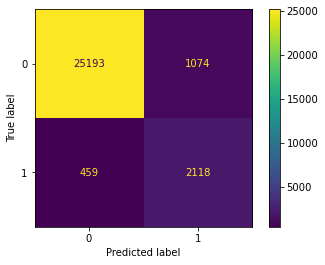

In [198]:
model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
model2.fit(X_train, y_train)
report_model(model2)

In [244]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['negative', 'positive'],
    mode='classification'
)

In [245]:
def return_weights(exp):
    
    """Get weights from LIME explanation object"""
    
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    
    return exp_weight

In [240]:
X_test.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_history_current',
       'smoking_history_former', 'gender_Male'],
      dtype='object')

In [246]:
weights = []

#Iterate over first 100 rows in feature matrix
for x in X_test.values[0:100]:
    
    #Get explanation
    exp = explainer.explain_instance(
        data_row=x, 
        predict_fn=model2.predict_proba
    )
    
    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)
    
#Create DataFrame
lime_weights = pd.DataFrame(data=weights,columns=X_test.columns)

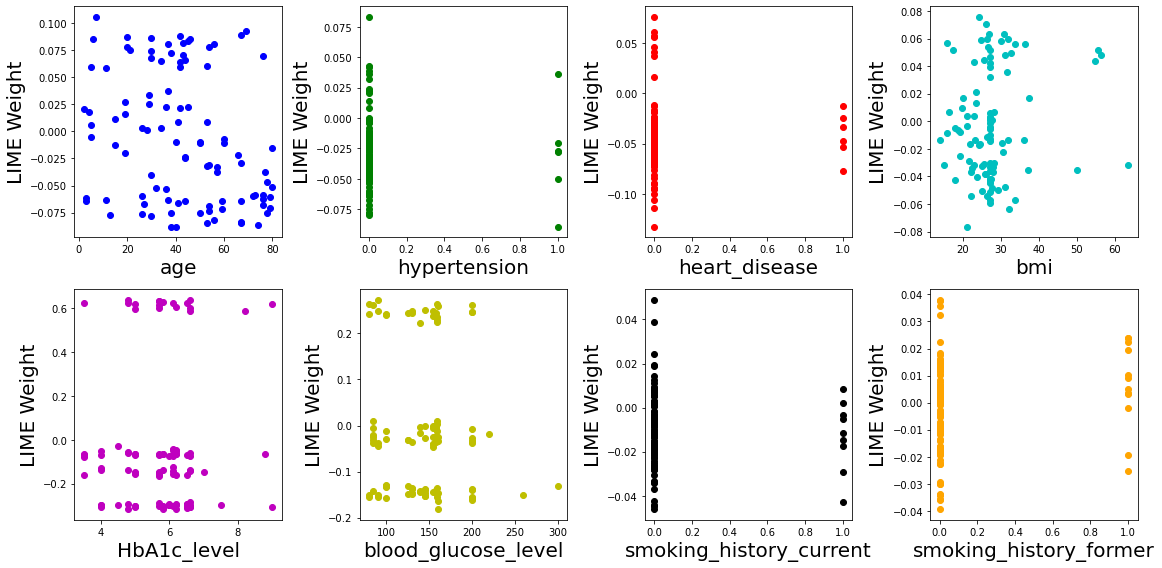

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']  # List of colors for each subplot

for (x_col, lw_col), color, ax in zip(zip(X.columns, lime_weights.columns), colors, axs.ravel()):
    feature_value = X[x_col][0:100]
    feature_weight = lime_weights[lw_col][0:100]

    ax.scatter(x=feature_value, y=feature_weight, color=color)
    ax.set_ylabel('LIME Weight', size=20)
    ax.set_xlabel(x_col, size=20)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Mean |Weight|')

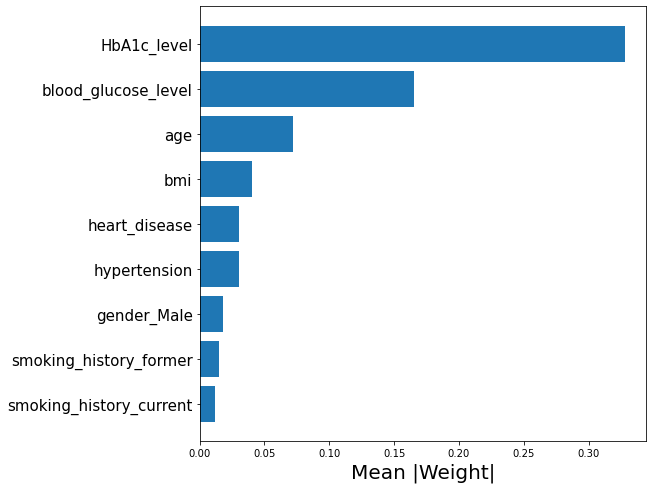

In [247]:
#Get abs mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)

In [187]:
import shap

#Get SHAP values
explainer = shap.Explainer(model2)
shap_values = explainer(X[0:100])

#Replace SHAP values with LIME weights
shap_placeholder = explainer(X[0:100])
shap_placeholder.values = np.array(lime_weights)

Text(0.5, 0, 'LIME value')

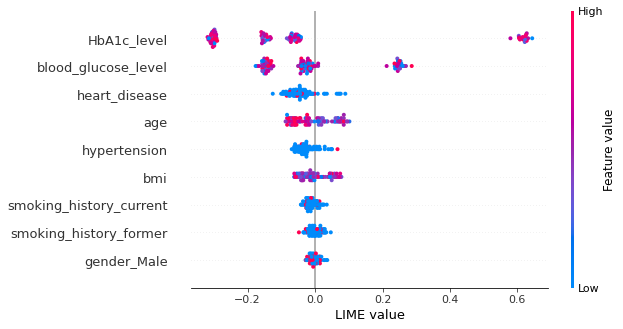

In [190]:
shap.plots.beeswarm(shap_placeholder, show=False)
plt.xlabel('LIME value')

model without age
the accuracy on train set 0.9601051974681287
the accuracy on test set 0.9516363888503675

              precision    recall  f1-score   support

       False       0.98      0.97      0.97     26267
        True       0.71      0.79      0.74      2577

    accuracy                           0.95     28844
   macro avg       0.84      0.88      0.86     28844
weighted avg       0.95      0.95      0.95     28844



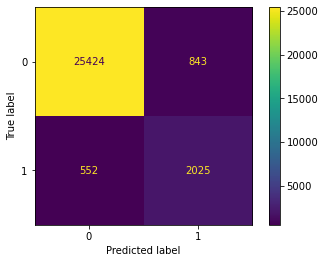

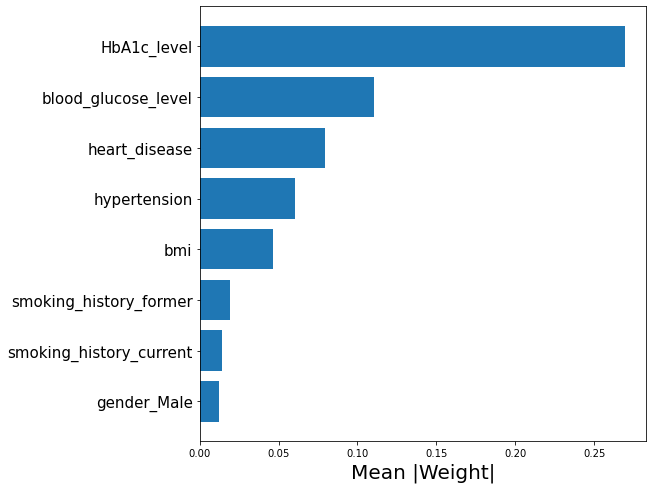

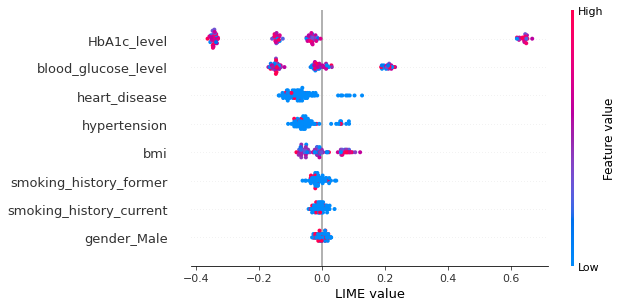

model without hypertension
the accuracy on train set 0.9528840153338682
the accuracy on test set 0.9462973235334905

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.66      0.82      0.73      2577

    accuracy                           0.95     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.95      0.95     28844



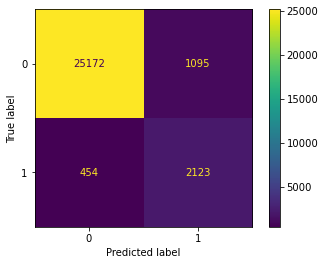

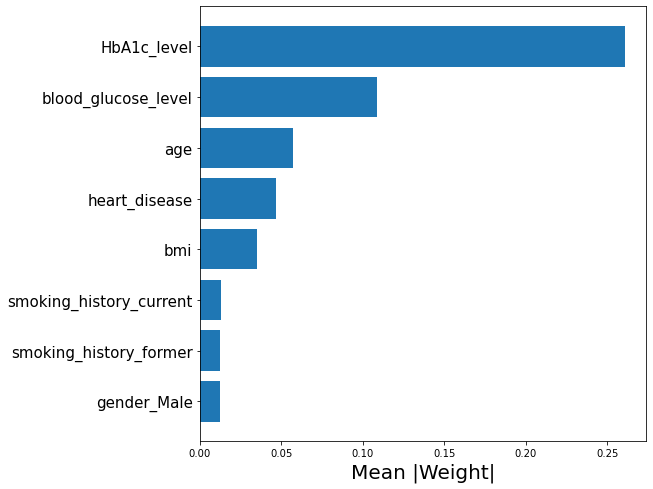

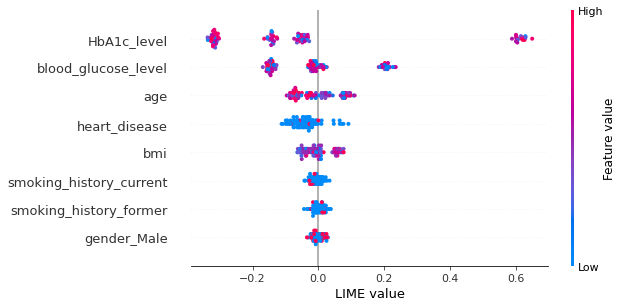

model without heart_disease
the accuracy on train set 0.9544292888770022
the accuracy on test set 0.9448065455554014

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.65      0.82      0.73      2577

    accuracy                           0.94     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.94      0.95     28844



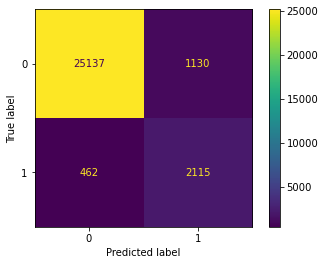

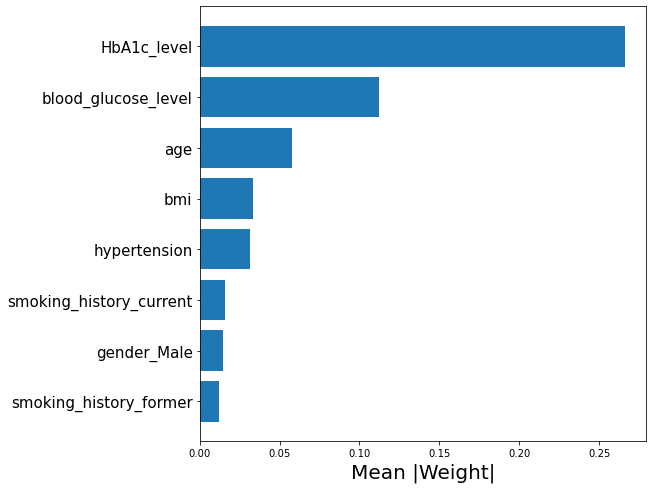

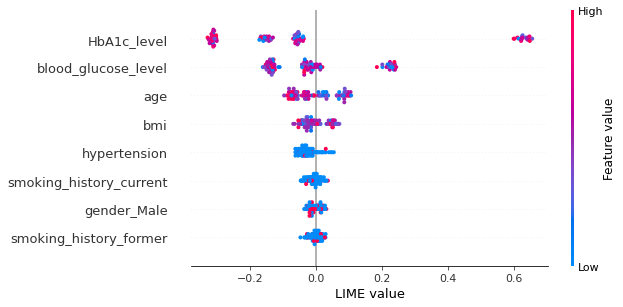

model without bmi
the accuracy on train set 0.949555733856349
the accuracy on test set 0.9424837054500069

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.64      0.81      0.71      2577

    accuracy                           0.94     28844
   macro avg       0.81      0.88      0.84     28844
weighted avg       0.95      0.94      0.95     28844



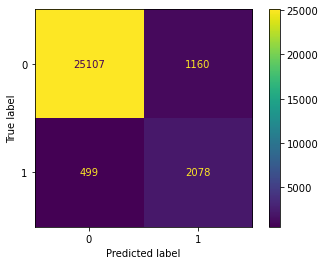

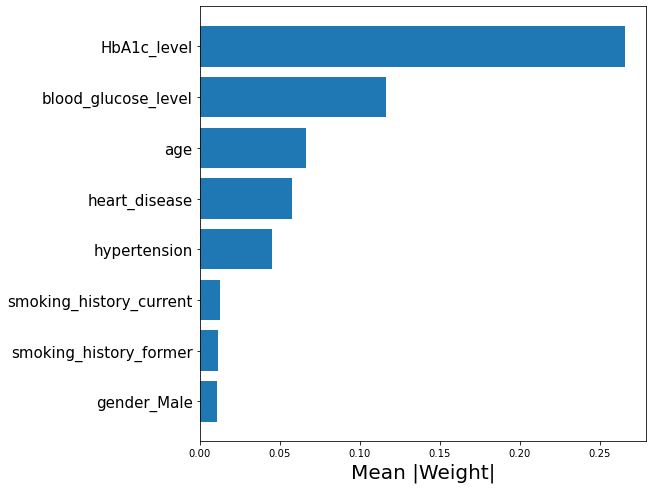

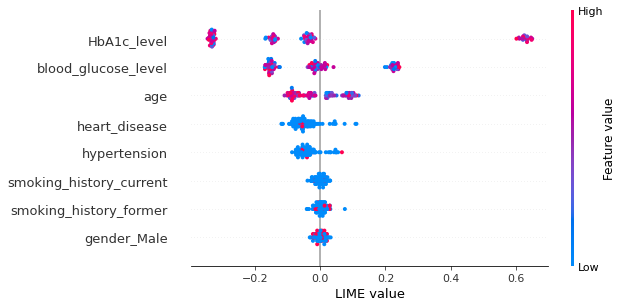

model without HbA1c_level
the accuracy on train set 0.9074767466048558
the accuracy on test set 0.9003952295104701

              precision    recall  f1-score   support

       False       0.97      0.92      0.94     26267
        True       0.46      0.72      0.57      2577

    accuracy                           0.90     28844
   macro avg       0.72      0.82      0.75     28844
weighted avg       0.93      0.90      0.91     28844



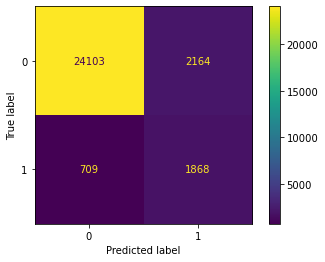

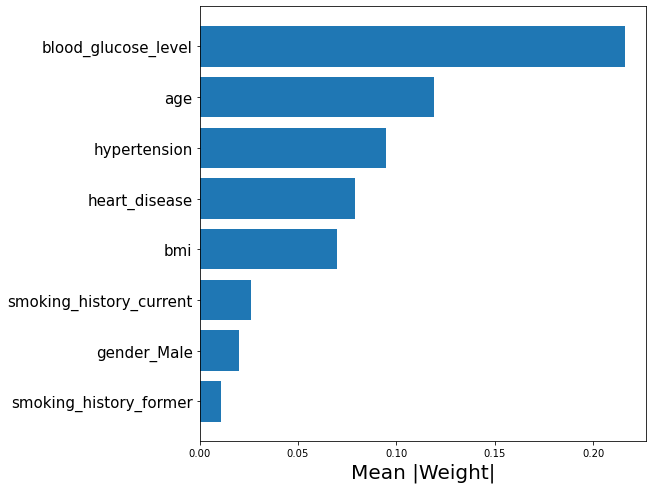

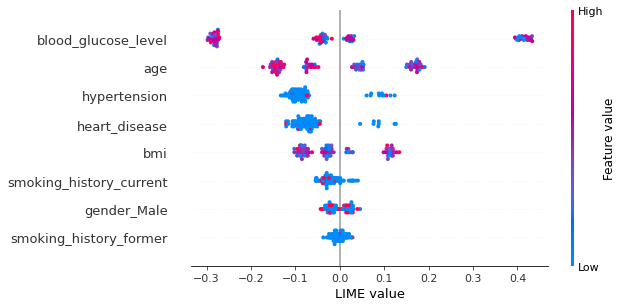

model without blood_glucose_level
the accuracy on train set 0.9199429437460996
the accuracy on test set 0.9143322701428374

              precision    recall  f1-score   support

       False       0.97      0.93      0.95     26267
        True       0.51      0.74      0.61      2577

    accuracy                           0.91     28844
   macro avg       0.74      0.84      0.78     28844
weighted avg       0.93      0.91      0.92     28844



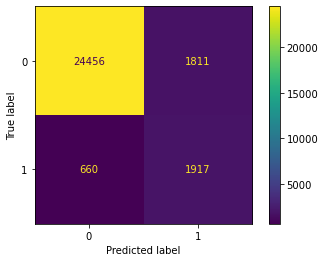

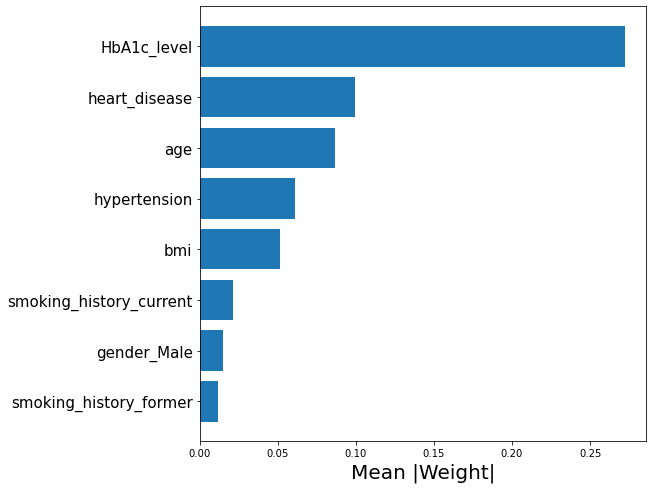

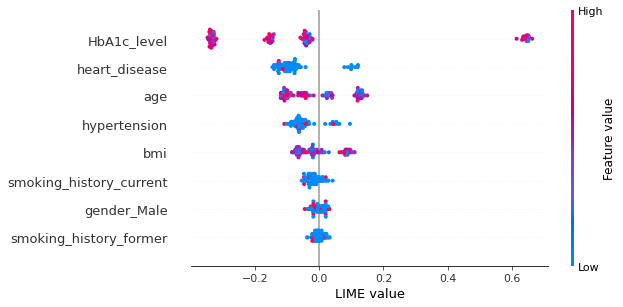

model without smoking_history_current
the accuracy on train set 0.9564054560042792
the accuracy on test set 0.9472333934267092

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.67      0.82      0.74      2577

    accuracy                           0.95     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.95      0.95     28844



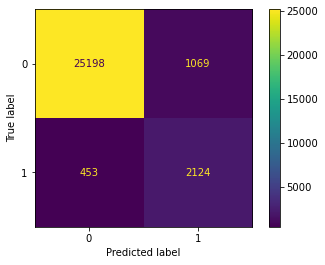

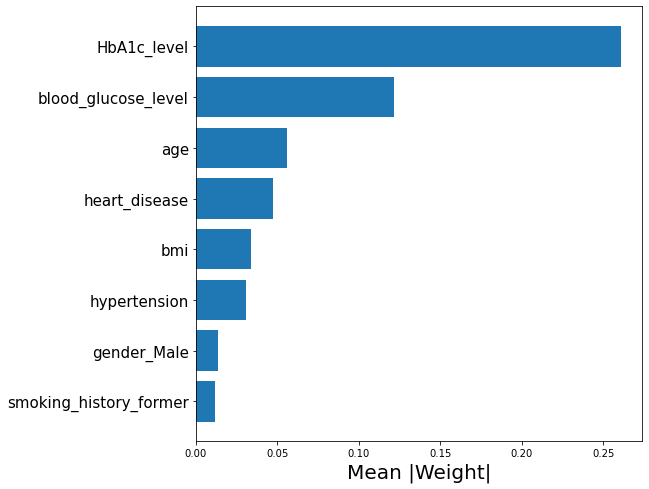

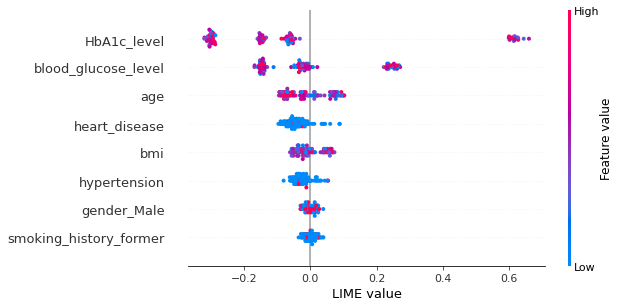

model without smoking_history_former
the accuracy on train set 0.9558408368250572
the accuracy on test set 0.9477187630009707

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.67      0.83      0.74      2577

    accuracy                           0.95     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.95      0.95     28844



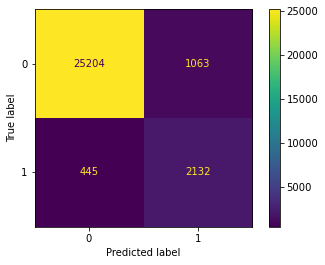

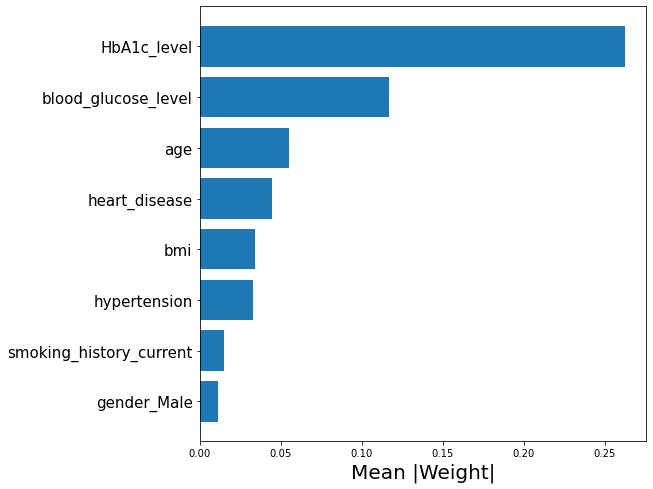

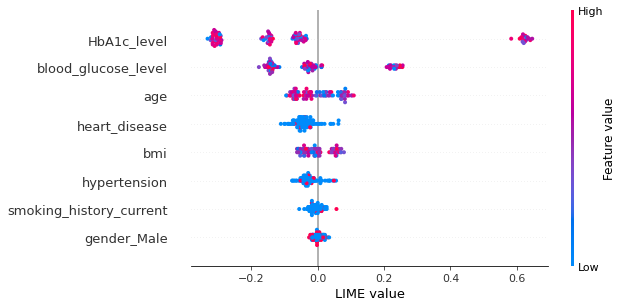

model without gender_Male
the accuracy on train set 0.9553207928441948
the accuracy on test set 0.9474067397032312

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     26267
        True       0.67      0.83      0.74      2577

    accuracy                           0.95     28844
   macro avg       0.82      0.89      0.85     28844
weighted avg       0.95      0.95      0.95     28844



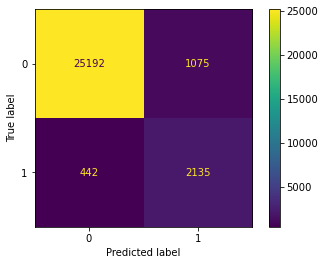

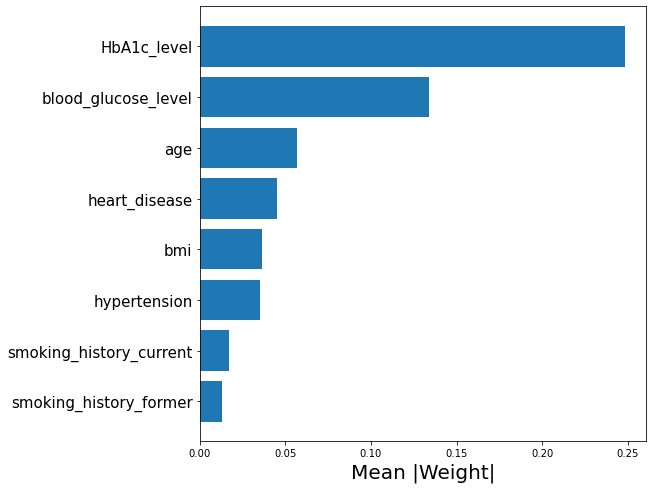

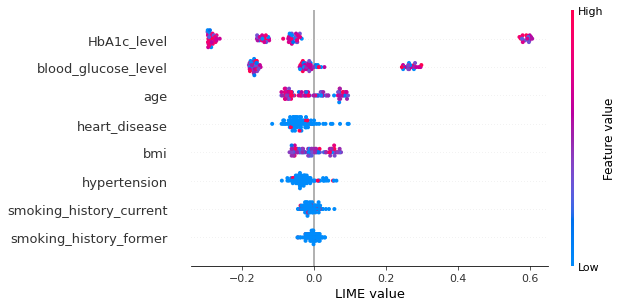

In [35]:
for x in X.columns:
    print('model without', x)
    X_temp = X.drop(x, axis = 1)
    X_train, X_test, y_train , y_test = train_test_split(X_temp, y, test_size = 0.3, random_state = 42)

    model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
    model2.fit(X_train, y_train)
    report_model(model2)

    explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=X_train.columns,
        class_names=['negative', 'positive'],
        mode='classification'
    )

    weights = []

    #Iterate over first 100 rows in feature matrix
    for x in X_test.values[0:100]:

        #Get explanation
        exp = explainer.explain_instance(
            data_row=x, 
            predict_fn=model2.predict_proba
        )

        #Get weights
        exp_weight = return_weights(exp)
        weights.append(exp_weight)

    #Create DataFrame
    lime_weights = pd.DataFrame(data=weights,columns=X_test.columns)

    #Get abs mean of LIME weights
    abs_mean = lime_weights.abs().mean(axis=0)
    abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
    abs_mean = abs_mean.sort_values('abs_mean')

    #Plot abs mean
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

    y_ticks = range(len(abs_mean))
    y_labels = abs_mean.feature
    plt.barh(y=y_ticks,width=abs_mean.abs_mean)

    plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
    plt.title('')
    plt.ylabel('')
    plt.xlabel('Mean |Weight|',size=20)
    plt.show()

    #Get SHAP values
    explainer = shap.Explainer(model2)
    shap_values = explainer(X_temp[0:100])

    #Replace SHAP values with LIME weights
    shap_placeholder = explainer(X_temp[0:100])
    shap_placeholder.values = np.array(lime_weights)


    shap.plots.beeswarm(shap_placeholder, show=False)
    plt.xlabel('LIME value')
    plt.show()




In [225]:
cols = ['feature ommited', 'accuracy train', 'accuracy test', 'ROC AUC']
df = pd.DataFrame(columns=cols)
from sklearn import metrics

for x in X.columns:
    X_temp = X.drop(x, axis = 1)
    X_train, X_test, y_train , y_test = train_test_split(X_temp, y, test_size = 0.3, random_state = 42)

    model = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
    model.fit(X_train, y_train)
    y_train_repo = model.predict(X_train)
    y_test_repo = model.predict(X_test)
    train_accu = accuracy_score(y_train, y_train_repo)
    test_accu = accuracy_score(y_test, y_test_repo)
    auc = metrics.roc_auc_score(y_test, y_test_repo)
    df = df.append({'feature ommited': x, 'accuracy train' : train_accu, 'accuracy test' : test_accu, 'ROC AUC' : auc},ignore_index=True)

df

,feature ommited,accuracy train,accuracy test,ROC AUC
0,age,0.890227,0.867079,0.881701
1,hypertension,0.906943,0.888103,0.905512
2,heart_disease,0.907238,0.887317,0.904205
3,bmi,0.889932,0.875626,0.896926
4,HbA1c_level,0.830182,0.802142,0.835503
5,blood_glucose_level,0.842941,0.818057,0.849514
6,smoking_history_current,0.910228,0.889970,0.906366
7,smoking_history_former,0.909807,0.889085,0.904080
8,gender_Male,0.911617,0.889380,0.904799


In [22]:
df=df.reset_index() 
df=df.drop(['index'],axis=1)

In [23]:
df

,feature ommited,accuracy train,accuracy test
0,age,0.960105,0.951636
1,hypertension,0.952884,0.946297
2,heart_disease,0.954429,0.944807
3,bmi,0.949556,0.942484
4,HbA1c_level,0.907477,0.900395
5,blood_glucose_level,0.919943,0.914332
6,smoking_history_current,0.956405,0.947233
7,smoking_history_former,0.955841,0.947719
8,gender_Male,0.955321,0.947407


class 0: (87664, 9)
class 1: (8482, 9)


<AxesSubplot:title={'center':'count (target)'}>

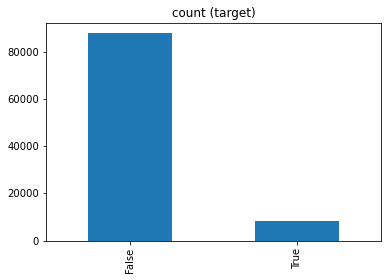

In [200]:
# class count
class_count_0, class_count_1 = df['diabetes'].value_counts()

# Separate class
class_0 = df[df['diabetes'] == 0]
class_1 = df[df['diabetes'] == 1] 
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
df['diabetes'].value_counts().plot(kind='bar', title='count (target)')

total class of 1 and 0: False    25446
True      8482
Name: diabetes, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

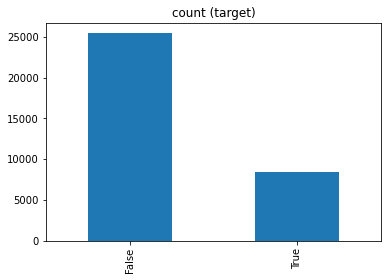

In [199]:
class_0_under = class_0.sample(class_count_1 * 4)
class_1_over = class_1.sample(class_count_1 * 4, replace = True)

test_under = pd.concat([class_0_under, class_1_over], axis=0)

print("total class of 1 and 0:",test_under['diabetes'].value_counts())# plot the count after under-sampeling
test_under['diabetes'].value_counts().plot(kind='bar', title='count (target)')

In [53]:
from collections import Counter

Counter({False: 87664, True: 8482})
Counter({False: 87664, True: 87664})


In [67]:
from numpy import where

In [75]:
counter = Counter(y)
print(counter)

Counter({False: 87664, True: 8482})


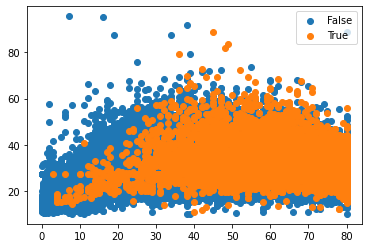

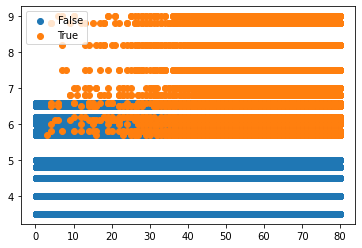

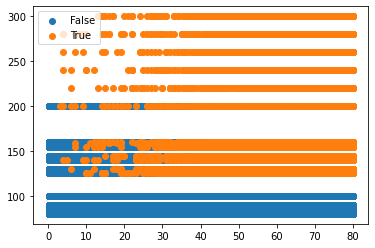

In [74]:
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 3], label=str(label))
plt.legend()
plt.show()
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 4], label=str(label))
plt.legend()
plt.show()
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 5], label=str(label))
plt.legend()
plt.show()

In [76]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

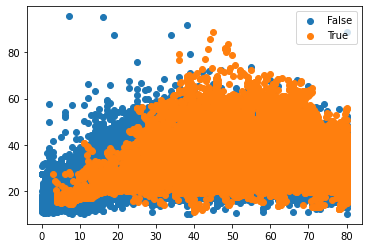

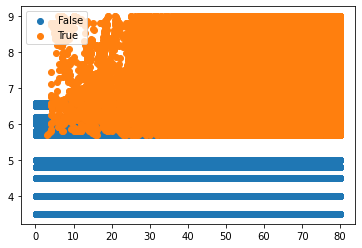

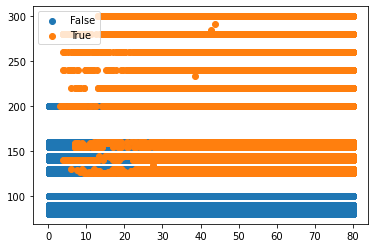

In [77]:
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 3], label=str(label))
plt.legend()
plt.show()
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 4], label=str(label))
plt.legend()
plt.show()
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X.values[row_ix, 0], X.values[row_ix, 5], label=str(label))
plt.legend()
plt.show()

In [108]:
counter = Counter(y)
print(counter)

Counter({False: 87664, True: 8482})


In [162]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

X_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({False: 87664, True: 8482})
Resample dataset shape: Counter({False: 8482, True: 8482})


In [163]:
X = X_nm
y = y_nm

In [164]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

the accuracy on train set 0.9249663148439254
the accuracy on test set 0.9105973277443018

              precision    recall  f1-score   support

       False       0.98      0.91      0.94     12680
        True       0.68      0.91      0.78      2588

    accuracy                           0.91     15268
   macro avg       0.83      0.91      0.86     15268
weighted avg       0.93      0.91      0.92     15268



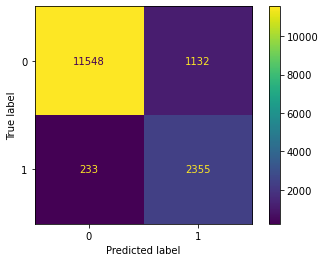

In [205]:
model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
model2.fit(X_train, y_train)
report_model(model2)

In [113]:
nm.get_params(deep=True)

{'n_jobs': None,
 'n_neighbors': 3,
 'n_neighbors_ver3': 3,
 'sampling_strategy': 'auto',
 'version': 1}

In [219]:
# class count
class_count_0, class_count_1 = df['diabetes'].value_counts()

# Separate class
class_0 = df[df['diabetes'] == 0]
class_1 = df[df['diabetes'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (87664, 9)
class 1: (8482, 9)


In [233]:
class_0_under = class_0.sample(class_count_1 * 3)

test_under = pd.concat([class_0_under, class_1], axis=0)
print('class 0:', class_0_under.shape)
print('class 1:', class_1.shape)

class 0: (25446, 9)
class 1: (8482, 9)


In [234]:
df = test_under

In [235]:
X = df.drop('diabetes', axis = 1 )
y = df.diabetes
X = pd.get_dummies(X, columns=['smoking_history', 'gender'], drop_first=True)
X = X.drop(['gender_Other', 'smoking_history_not current', 'smoking_history_never', 'smoking_history_ever'], axis=1)

In [236]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

the accuracy on train set 0.908796159838309
the accuracy on test set 0.8931132724236173

              precision    recall  f1-score   support

       False       0.98      0.88      0.92      7628
        True       0.72      0.94      0.82      2551

    accuracy                           0.89     10179
   macro avg       0.85      0.91      0.87     10179
weighted avg       0.91      0.89      0.90     10179



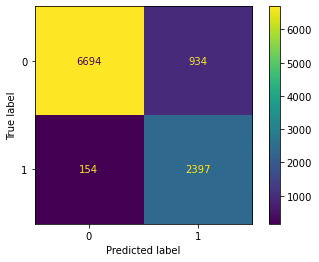

In [241]:
model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
model2.fit(X_train, y_train)
report_model(model2)

In [237]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_former,gender_Male
53280,65.0,False,False,26.56,5.8,85,1,0,0
30926,19.0,False,False,39.29,6.0,80,0,0,0
84425,47.0,False,False,25.42,4.0,126,0,0,0
82777,54.0,False,False,27.25,6.1,145,0,0,0
20223,45.0,False,False,22.52,6.1,90,0,0,0
...,...,...,...,...,...,...,...,...,...
99935,65.0,True,True,33.55,8.2,140,0,0,0
99938,55.0,False,True,30.42,6.2,300,0,1,1
99957,61.0,False,False,34.45,6.5,280,0,0,0
99962,58.0,True,False,38.31,7.0,200,0,0,0
